In [1]:
import czifile
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math



In [4]:
img = czifile.imread('../data/C22_rat11_M.czi')
print(img.shape)

(1, 1, 1, 3996, 7783, 1)


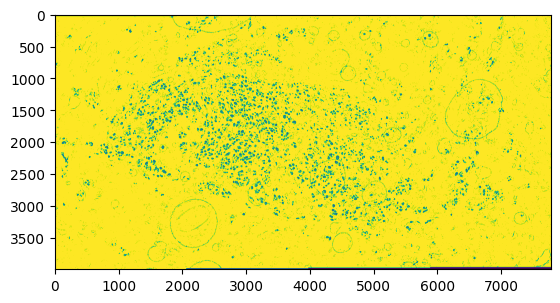

In [2]:
import utils
img=utils.import_image('../data/C22_rat11_M.czi')
plt.imshow(img)

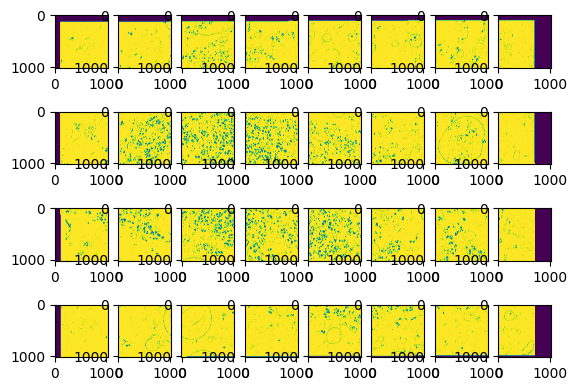

In [80]:

dim=img.shape
photo_dim= 1024
start = [0,0]
dim_ceil = (math.ceil(dim [0]/ photo_dim) *photo_dim ,math.ceil(dim [1]/ photo_dim)*photo_dim)
img2=np.pad(img, (dim_ceil[0] - dim[0],dim_ceil[1] - dim[1]))
h_num_photo = int(dim_ceil[0] / photo_dim)
v_num_photo = int(dim_ceil[1] / photo_dim)
fig, axs = plt.subplots(h_num_photo, v_num_photo)
fig3D = []
for i in range(h_num_photo):
    for j in range(v_num_photo):
        arr = img2[start[0]+i*photo_dim:start[0]+(i+1)*photo_dim,start[1]+j*photo_dim:start[1]+(j+1)*photo_dim]
        axs[i, j].imshow(arr)
        fig3D.append(arr)

In [3]:
import utils
fig3D = utils.decompose_image(img,photo_dim = 1024, start = (0,0))
utils.save_images(fig3D, "../new_data","rat")

In [85]:
len(fig3D)

32

/var/folders/b0/lvr6c0md2rb5v_rb1ngcc27h0000gn/T/ipykernel_25798/697323904.py:9: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i, j].imshow(arr)


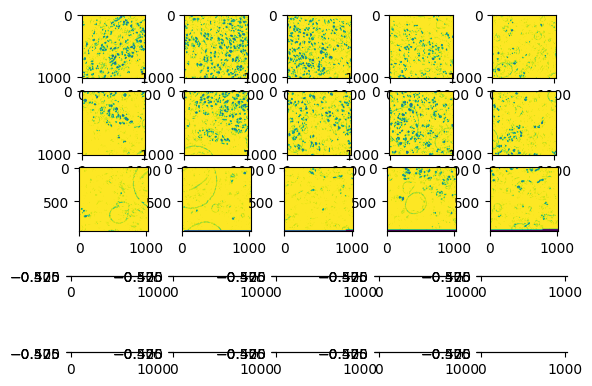

In [32]:
img=utils.import_image('../data/C22_rat11_M.czi')
dim=img.shape()
photo_dim= 1024
start = [0,0]
dim_ceil = (math.ceil(dim [0]/ photo_dim),math.ceil(dim [1]/ photo_dim))
img
fig, axs = plt.subplots(nb_photo, nb_photo)
fig3D = []
for i in range(nb_photo):
    for j in range(nb_photo):
        arr = img[0,0,channel,start[0]+i*photo_dim:start[0]+(i+1)*photo_dim,start[1]+j*photo_dim:start[1]+(j+1)*photo_dim,0]
        axs[i, j].imshow(arr)
        fig3D.append(arr)
        

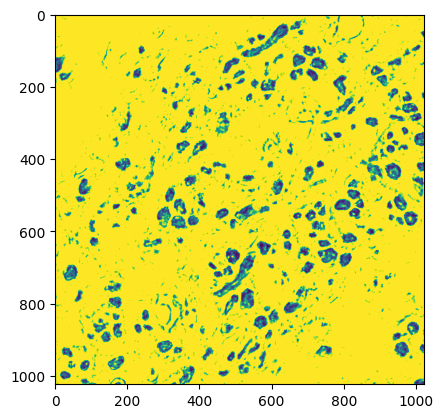

In [36]:
plt.imshow(fig3D[0])

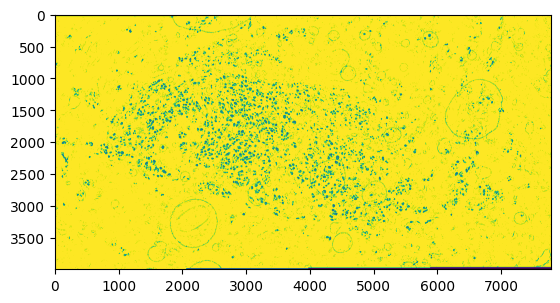

In [9]:
import utils
image_path = '../data/C22_rat11_M.czi'
image = utils.import_image(image_path)
plt.imshow(image)

In [16]:
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [13]:
from PIL import Image

In [17]:
img = Image.fromarray(image,"L")

In [88]:
filename = "this file"
for i in range (5):
    filenameupdate= filename + "_"+ str(i)
    print(filenameupdate)

this file_0
this file_1
this file_2
this file_3
this file_4


In [23]:
img.save("../new_data/new_image.jpeg")

## Train YOLO Model

In [1]:
# pip install ultralytics
#paths:
train_path = 'new_data/train'
val_path = 'new_data/val'

In [2]:
from ultralytics import YOLO
model = YOLO

In [4]:
model.train(data='data.yaml', epochs = 50)

TypeError: _check_is_pytorch_model() missing 1 required positional argument: 'self'

In [36]:
import xml.etree.ElementTree as ET

# Define the path to your XML file
xml_file_path = '../new_data/rat_1.xml'

# Define the path for the output text file
txt_file_path = '../new_data/rat_1.txt'

# Function to parse XML and extract labels
def extract_labels_from_xml(xml_file):
    x_min_values = []
    y_min_values = []
    x_max_values = []
    y_max_values = []
    x_values = []
    # Parse the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()
    size= root.find('size')
    width = int(size.find('width').text)
    height= int(size.find('height').text)

    # Loop through all 'object' elements in the XML
    for obj in root.findall('object'):
        # Find the 'bndbox' element
        bndbox = obj.find('bndbox')
        # Extract the 'x_min' value as an integer
        x_min = int(bndbox.find('xmin').text)
        y_min = int(bndbox.find('ymin').text)
        x_max = int(bndbox.find('xmax').text)
        y_max = int(bndbox.find('ymax').text)
        x_min_values.append(x_min)
        y_min_values.append(y_min)
        x_max_values.append(x_max)
        y_max_values.append(y_max)
    return x_min_values, y_min_values, x_max_values, y_max_values, width, height


def convert_xml_to_txt(source, destination):
    # Get the x_min values as integers from the XML file
    x_min_values, y_min_values, x_max_values, y_max_values, width, height = extract_labels_from_xml(source)
    # Write labels to a text file
    with open(destination, 'w') as txt_file:
        for label in range(len(x_min_values)):
            x = (x_min_values[label] + x_max_values[label])/ (2 * width)
            y = (y_min_values[label] + y_max_values[label])/ (2 * height)
            w = (x_max_values[label] - x_min_values[label])/ (width)
            h = (y_max_values[label] - y_min_values[label])/ (height)
            txt_file.write('1' + '\t')
            txt_file.write(str(x) + '\t')
            txt_file.write(str(y) + '\t')
            txt_file.write(str(w) + '\t')
            txt_file.write(str(h) + '\n')
    print(f'Labels extracted and saved to {destination}')


In [37]:
# Define the path to your XML file
for i in range(16,19):
    source = '../new_data/rat_'+str(i)+'.xml'
    destination = '../new_data/rat_'+str(i)+'.txt'
    convert_xml_to_txt(source, destination)

Labels extracted and saved to ../new_data/rat_16.txt
Labels extracted and saved to ../new_data/rat_17.txt
Labels extracted and saved to ../new_data/rat_18.txt
